# Proyecto 1.- Extracción, limpieza, caracterización y análisis de datos

El proyecto consistirá en: 

 - Encontrar una fuente de datos libre y extraer los datos de la manera más automatizada posible.

 - Realizar una limpieza de datos nulos y gestión de valores extremos.

 - Crear o diseñar una serie de nuevas variables, categorizaciones, índices o kpis que nos aporten información de cara a un futuro análisis de datos.

 - Realizar el análisis de datos, obtener conclusiones relevantes de nuestro análisis, diferencias significativas entre las distintas dimensiones.
 
 - Presentación de 5 minutos para toda la clase. En powerpoint u otro formato similar, sin código, solo representaciones visuales y tablas, y conclusiones.

## Recomendación pasos a seguir:

 - Localiza la temática de datos que te gustaría extraer, trabajar y analizar, y encuentra una fuente de datos al respecto. Puede basarte en las propuestas a continuación o buscar una propia.
 - Inspecciona de manera general el alcance de esa fuente de datos, qué informaciones contiene, cuántas tablas, ficheros, líneas. Cuál es su granularidad (qué representa cada línea de las diferentes tablas de que dispones), el número de variables y su tipo.
 - Imagina y plantea qué análisis podrías realizar y a que conclusiones podrías llegar, qué querrías explicar o demostrar, y si con esos datos que tienes es posible, si son lo suficientemente ricos.
 - Extrae los datos. Nunca perdiendo de vista si aquello que planteaste sigue siendo posible de realizar, a medida que vas conociendo mejor los datos.
 - A continuación, sigue los pasos habituales del análisis exploratorio: limpieza de nulos, gestión de valores extremos, ingeniería de variables, representación y análisis de los datos.

## Extracción de datos

Preferiblemente la extracción de datos deberá realizarse a partir de una página web usando las técnicas de _web scraping_, por ejemplo recolectando los productos de una tienda o supermercado y sus características, para luego realizar un análisis de mercado. O bien a través de una API pública. Puedes usar alguno de las siguientes propuestas:

 1. [FACEIT](https://docs.faceit.com/api/data/) es una plataforma de gaming, en la que los jugadores se conectan, organizan partidas dependiendo del nivel... Proporciona un histórico de cada una de las partidas de cada jugador.
 
 2. [TRY plant database](https://www.try-db.org/TryWeb/Data.php#3) ofrece una serie de datasets con la información con la que se han desarrollado investigaciones científicas 
 
 3. [GBIF](https://techdocs.gbif.org/en/openapi/) API sobre información global de biodiversidad
 
 4. [Binance](https://developers.binance.com/docs/binance-spot-api-docs/web-socket-api/general-api-information) Es una plataforma de financial trading
 
 6. [yahoo finance](https://pypi.org/project/yfinance/) librería de python que ofrece los precios de las bolsas a nivel mundial día a día
 
 7. [EUROSTAT](https://ec.europa.eu/eurostat/web/main/data/database) bases de datos con información socioeconómica por paises de la UE
 
 - [50 apis publicas](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) 
 
 - [USA data](https://datausa.io/)
 
 - [Space X](https://github.com/r-spacex/SpaceX-API/tree/master)
 
 - [EMT Madrid: Bicimad](https://apidocs.emtmadrid.es/)
 
 - [OpenData Barcelona](https://opendata-ajuntament.barcelona.cat/data/es/dataset)
 
 - [Web scraping de idealista](https://scrapfly.io/blog/how-to-scrape-idealista/#idealista-scraping-summary)
 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [51]:
df.shape

(374, 13)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [53]:
#valores nulos 
valores_nulos = df.isnull().sum()
print(valores_nulos)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [54]:
#Reemplazar valores nulos 
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [55]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [56]:
#Valores min y max por columnas
min_age = df['Age'].min()
max_age = df['Age'].max()
print(min_age)
print(max_age)

27
59


In [57]:
#Valores min y max por columnas

mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(mean_age)
print(median_age)

42.18449197860963
43.0


In [62]:
# Selected columns
selected_columns = ['Occupation', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Sleep Disorder']

# 
unique_values_selected = {column: df[column].unique() for column in selected_columns}

# 
for column, values in unique_values_selected.items():
    print(f"Unique values in the column '{column}': {values}")

Unique values in the column 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in the column 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in the column 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in the column 'Stress Level': [6 8 7 4 3 5]
Unique values in the column 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in the column 'Sleep Disorder': ['No Disorder' 'Sleep Apnea' 'Insomnia']


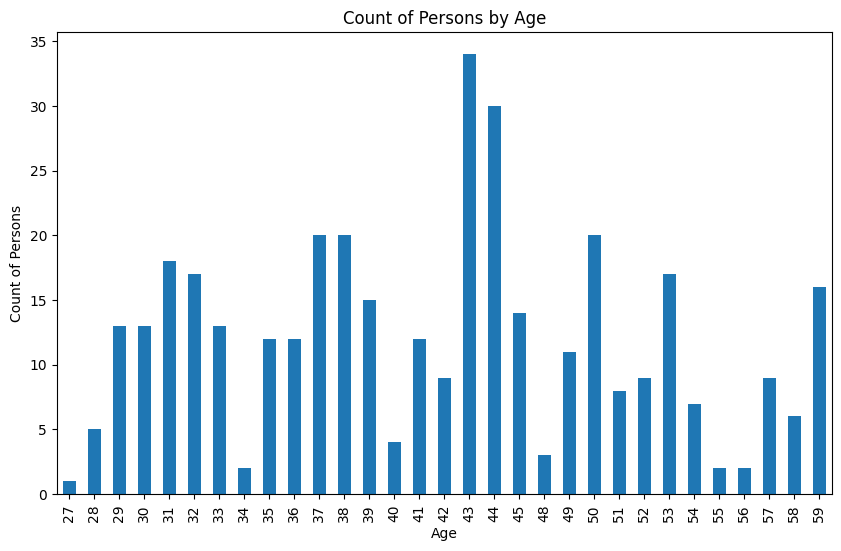

In [58]:
people_by_age = df.groupby('Age').size()
# People by Age Group
plt.figure(figsize=(10, 6))
people_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Age')
plt.show()

In [60]:
# Define age bins and labels
bins = [ 20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column 'Age Range' with categorized age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the dataset with the new column
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder Age Range  
0         126/83          77         4200    No Disorder     20-29  
1         125/

C:\Users\sofia.russmann\AppData\Local\Temp\ipykernel_3920\3298838706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  people_by_age = df.groupby('Age Range').size()


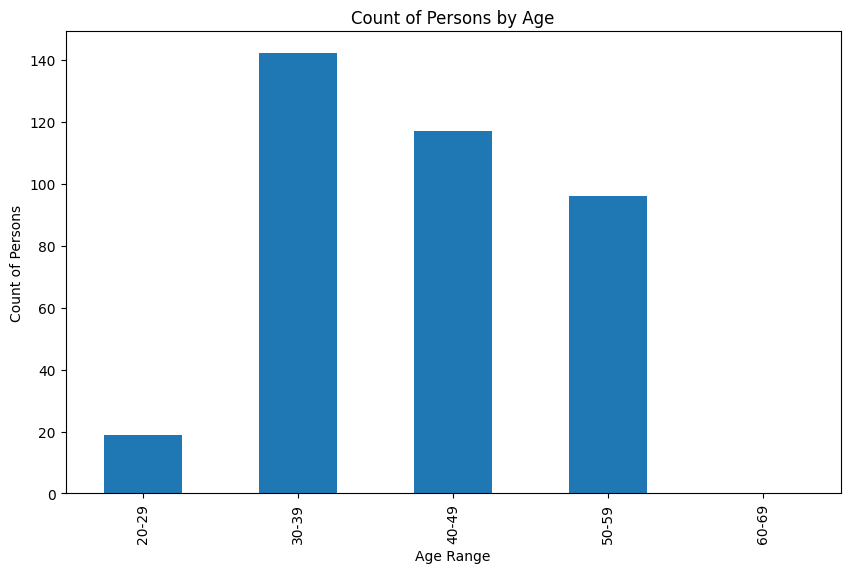

In [61]:
people_by_age = df.groupby('Age Range').size()
# People by Age Group
plt.figure(figsize=(10, 6))
people_by_age.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Age')
plt.show()

In [ ]:
# Interesting graphics:
#
#
#

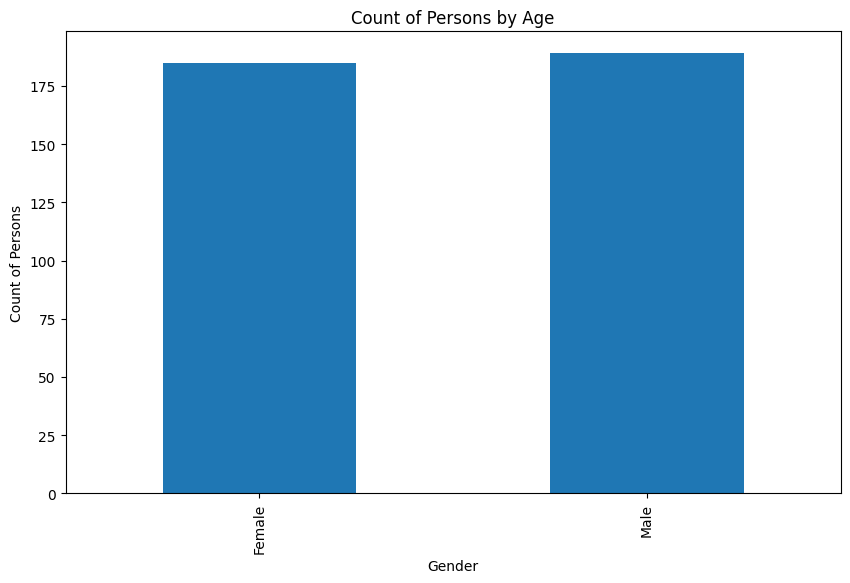

In [63]:
people_by_gender = df.groupby('Gender').size()
# People by Gender Group
plt.figure(figsize=(10, 6))
people_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Age')
plt.show()

In [65]:


# Define bins and labels for Physical Activity Level
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High', 'Ultra High', 'Maximal']

# Create a new column 'Physical Activity Category' with categorized physical activity levels
df['Physical Activity Category'] = pd.cut(df['Physical Activity Level'], bins=bins, labels=labels, right=False)

# Display the first few rows of the dataset with the new column
print(df.head())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder Age Range  \
0         126/83          77         4200    No Disorder     20-29   
1         12

C:\Users\sofia.russmann\AppData\Local\Temp\ipykernel_3920\871341753.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_activity_category = df.groupby('Physical Activity Category').size()


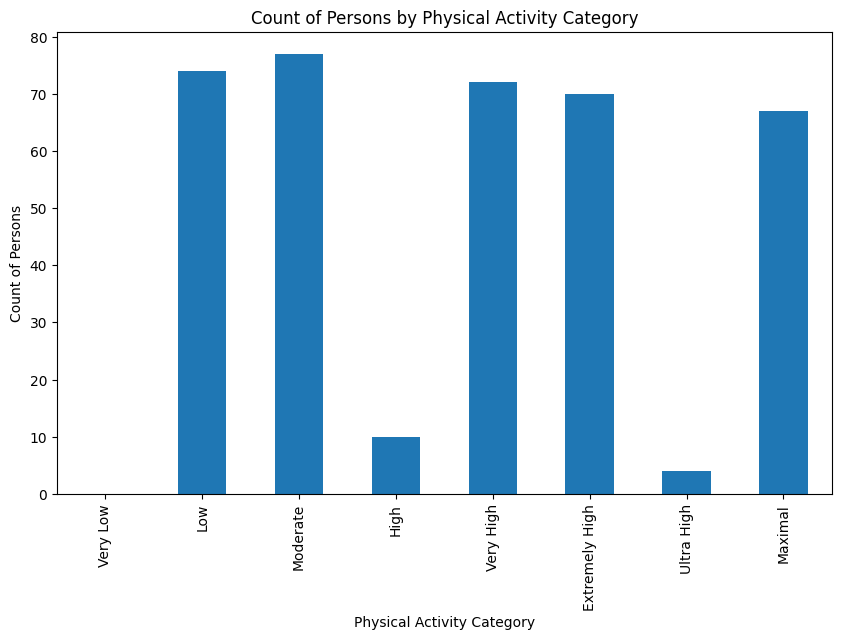

In [66]:
# Create a new column 'Physical Activity Category' with categorized physical activity levels
df['Physical Activity Category'] = pd.cut(df['Physical Activity Level'], bins=bins, labels=labels, right=False)

# Count persons by physical activity category
count_by_activity_category = df.groupby('Physical Activity Category').size()

# Bar chart: Count of persons by physical activity category
plt.figure(figsize=(10, 6))
count_by_activity_category.plot(kind='bar')
plt.xlabel('Physical Activity Category')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Physical Activity Category')
plt.show()

C:\Users\sofia.russmann\AppData\Local\Temp\ipykernel_3920\262022030.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_stress_category = df.groupby('Stress Level Category').size()


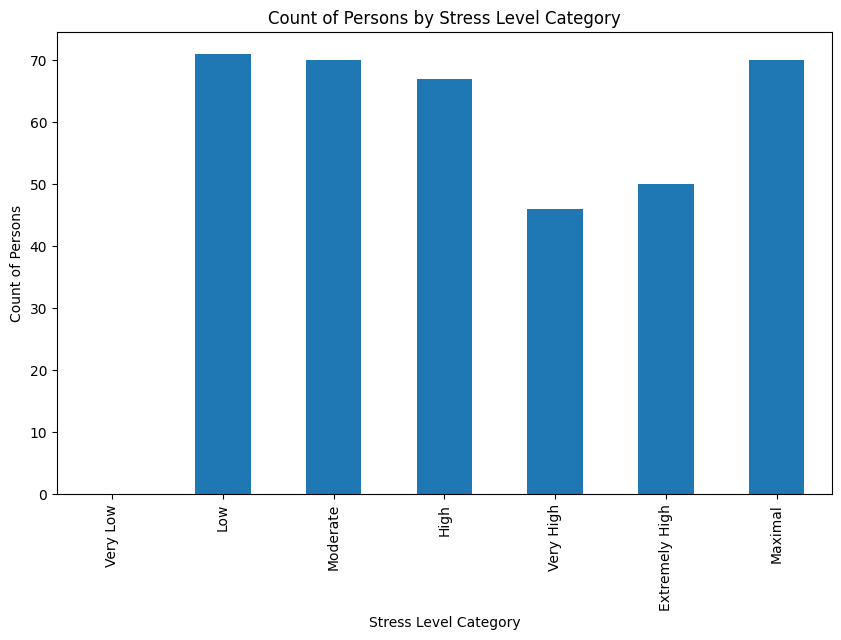

In [67]:
# Define bins and labels for Stress Level
bins = [0, 3, 4, 5, 6, 7, 8, 10]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High', 'Maximal']

# Create a new column 'Stress Level Category' with categorized stress levels
df['Stress Level Category'] = pd.cut(df['Stress Level'], bins=bins, labels=labels, right=False)

# Count persons by stress level category
count_by_stress_category = df.groupby('Stress Level Category').size()

# Bar chart: Count of persons by stress level category
plt.figure(figsize=(10, 6))
count_by_stress_category.plot(kind='bar')
plt.xlabel('Stress Level Category')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Stress Level Category')
plt.show()

In [68]:
# Selected columns
selected_column = ['Daily Steps']

# 
unique_values_steps = {column: df[column].unique() for column in selected_column}

# 
for column, values in unique_values_steps.items():
    print(f"Unique values in the column '{column}': {values}")

Unique values in the column 'Daily Steps': [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]


C:\Users\sofia.russmann\AppData\Local\Temp\ipykernel_3920\4134233968.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_steps_range = df.groupby('Daily Steps Range').size()


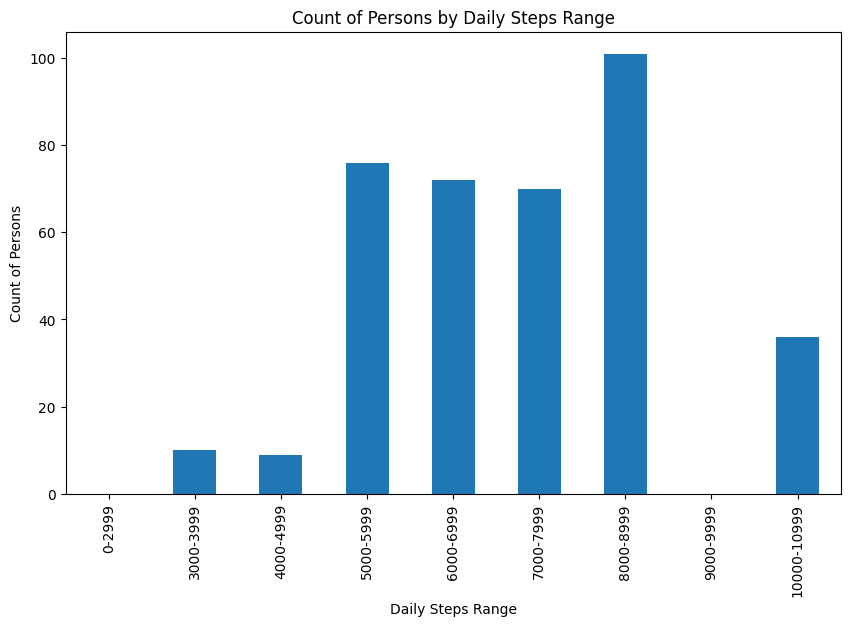

In [69]:
# Define bins and labels for Daily Steps
bins = [0, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]
labels = ['0-2999', '3000-3999', '4000-4999', '5000-5999', '6000-6999', '7000-7999', '8000-8999', '9000-9999', '10000-10999']

# Create a new column 'Daily Steps Range' with categorized daily steps
df['Daily Steps Range'] = pd.cut(df['Daily Steps'], bins=bins, labels=labels, right=False)

# Count persons by daily steps range
count_by_steps_range = df.groupby('Daily Steps Range').size()

# Bar chart: Count of persons by daily steps range
plt.figure(figsize=(10, 6))
count_by_steps_range.plot(kind='bar')
plt.xlabel('Daily Steps Range')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Daily Steps Range')
plt.show()

C:\Users\sofia.russmann\AppData\Local\Temp\ipykernel_3920\1984895916.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_steps_range = df.groupby('Daily Steps Range').size()


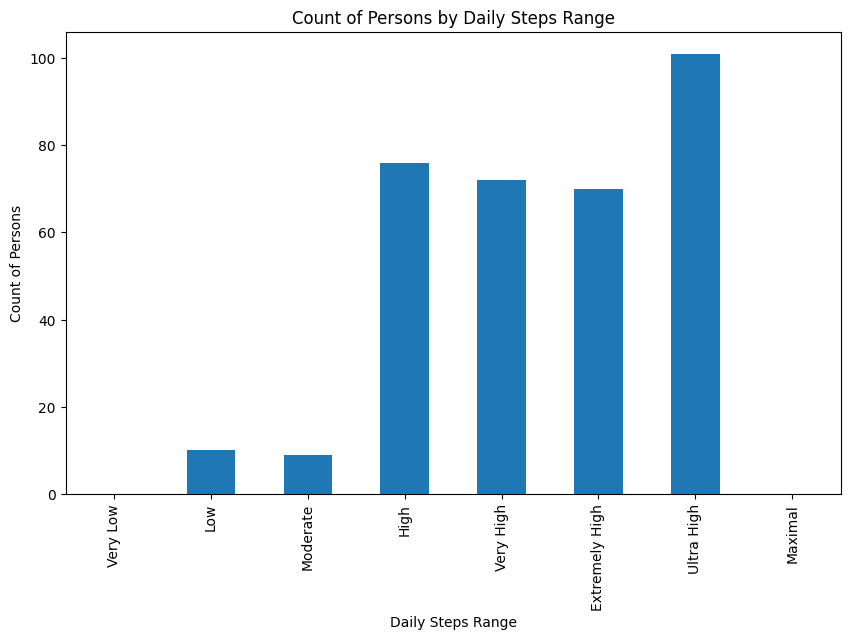

In [71]:
# Define bins and labels for Daily Steps
bins = [0, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High', 'Ultra High', 'Maximal']

# Create a new column 'Daily Steps Range' with categorized daily steps
df['Daily Steps Range'] = pd.cut(df['Daily Steps'], bins=bins, labels=labels, right=False)

# Count persons by daily steps range
count_by_steps_range = df.groupby('Daily Steps Range').size()

# Bar chart: Count of persons by daily steps range
plt.figure(figsize=(10, 6))
count_by_steps_range.plot(kind='bar')
plt.xlabel('Daily Steps Range')
plt.ylabel('Count of Persons')
plt.title('Count of Persons by Daily Steps Range')
plt.show()